In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from datetime import datetime
from MCForecastTools import MCSimulation
import requests
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
# Set Empty Dictionary
stock_dict = {}

# Set Empty List
stock_list = []

# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

# Validate Correct Date Format
validate(date)

# While Loop to Pick Stocks
while (True):
    
    # Name of Stock
    name = input("Add a stock ticker to the list: ").upper()
    
    # Validate Stock
    validateTick(name)
    
    # Add Value to Stock Dictionary
    stock_dict[name] = date
    
    # Add Value to Stock List
    stock_list.append(name)
    
    # Ask for More Stocks
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    
    # Break if Done
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  AMD
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
# Function to Create Stocks
def stockCreation(stock_dict, stock_list):
    
    # Create Empty List
    func_list = []

    # For Loop to Iterate through Stocks
    for key, value in stock_dict.items():
        
        # Collect Stock Data
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        
        # Assign Column Values
        globals()[key].columns = [[key, key, key, key, key, key,],["high", "low", "open", "close", "volume", "adj_close"]]

        # Append Each Stock into func_list
        func_list.append(globals()[key])
    
    # Set First Portfolio
    portfolio = func_list[0]
    
    # Create Portfolio Based on Number of Stocks
    if len(func_list) == 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True, suffixes=[f'_{stock_list[0]}', f'_{stock_list[1]}'])
    elif len(func_list) > 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True)
        for x in range(len(func_list)-2):
            portfolio = portfolio.merge(func_list[x + 2], left_index=True, right_index=True)
            
    # Create Empty List
    portfolio_close = []
    
    # Append Close Values to New List
    for x in range(len(stock_list)):
        portfolio_close.append(portfolio[stock_list[x]][f"adj_close"])
    
    # Create DataFrame from New List
    portfolio_close = pd.DataFrame(portfolio_close)
    
    # Transpose DataFrame
    portfolio_close = portfolio_close.T
    
    # Assign Column Names
    portfolio_close.columns = stock_list
        
    # Return Both DataFrames
    return portfolio, portfolio_close

In [5]:
# Call Function Above to Save Full Portfolio
portfolio = stockCreation(stock_dict, stock_list)[0]

# Show DataFrame
portfolio

TSLA                                                  \
                  high         low        open       close      volume   
Date                                                                     
2015-01-02   44.650002   42.652000   44.574001   43.862000  23822000.0   
2015-01-05   43.299999   41.431999   42.910000   42.018002  26842500.0   
2015-01-06   42.840000   40.841999   42.012001   42.256001  31309500.0   
2015-01-07   42.956001   41.956001   42.669998   42.189999  14842000.0   
2015-01-08   42.759998   42.001999   42.562000   42.124001  17212500.0   
...                ...         ...         ...         ...         ...   
2020-12-09  654.320007  588.000000  653.690002  604.479980  71291200.0   
2020-12-10  627.750000  566.340027  574.369995  627.070007  67083200.0   
2020-12-11  624.000000  596.799988  615.010010  609.989990  46475000.0   
2020-12-14  642.750000  610.200012  619.000000  639.830017  52040600.0   
2020-12-15  646.900024  623.799988  643.280029  633.250000  45071500.0   

                              MSFT                                      \
             adj_close        high         low        open       close   
Date                                                                     
2015-01-02   43.862000   47.419998   46.540001   46.660000   46.759998   
2015-01-05   42.018002   46.730000   46.250000   46.369999   46.330002   
2015-01-06   42.256001   46.750000   45.540001   46.380001   45.650002   
2015-01-07   42.189999   46.459999   45.490002   45.980000   46.230000   
2015-01-08   42.124001   47.750000   46.720001   46.750000   47.590000   
...                ...         ...         ...         ...         ...   
2020-12-09  604.479980  215.229996  211.210007  215.160004  211.800003   
2020-12-10  627.070007  213.080002  210.360001  211.770004  210.520004   
2020-12-11  609.989990  213.320007  209.110001  210.050003  213.259995   
2020-12-14  639.830017  216.210007  212.880005  213.100006  214.199997   
2020-12-15  633.250000  215.419998  212.240005  215.169998  214.130005   

                                          AMD                        \
                volume   adj_close       high        low       open   
Date                                                                  
2015-01-02  27913900.0   41.539135   2.670000   2.670000   2.670000   
2015-01-05  39673900.0   41.157158   2.700000   2.640000   2.670000   
2015-01-06  36447900.0   40.553074   2.660000   2.550000   2.650000   
2015-01-07  29114100.0   41.068310   2.650000   2.540000   2.630000   
2015-01-08  29645200.0   42.276463   2.650000   2.560000   2.590000   
...                ...         ...        ...        ...        ...   
2020-12-09  32440600.0  211.800003  94.699997  89.160004  92.760002   
2020-12-10  26733300.0  210.520004  92.089996  89.029999  89.550003   
2020-12-11  30979400.0  213.259995  92.330002  90.160004  91.540001   
2020-12-14  28798400.0  214.199997  95.410004  91.849998  92.209999   
2020-12-15  27000600.0  214.130005  97.980003  95.449997  95.930000   

                                            
                close    volume  adj_close  
Date                                        
2015-01-02   2.670000         0   2.670000  
2015-01-05   2.660000   8878200   2.660000  
2015-01-06   2.630000  13912500   2.630000  
2015-01-07   2.580000  12377600   2.580000  
2015-01-08   2.610000  11136600   2.610000  
...               ...       ...        ...  
2020-12-09  89.830002  52170400  89.830002  
2020-12-10  91.660004  33804400  91.660004  
2020-12-11  91.650002  28368100  91.650002  
2020-12-14  94.779999  48026400  94.779999  
2020-12-15  97.120003  57232700  97.120003  

[1500 rows x 18 columns]

In [6]:
# Call Function Above to Save Portfolio Close Values
portfolio_close = stockCreation(stock_dict, stock_list)[1]

# Show DataFrame
portfolio_close

,TSLA,MSFT,AMD
Date,,,
2015-01-02,43.862000,41.539135,2.670000
2015-01-05,42.018002,41.157158,2.660000
2015-01-06,42.256001,40.553074,2.630000
2015-01-07,42.189999,41.068310,2.580000
2015-01-08,42.124001,42.276463,2.610000
...,...,...,...
2020-12-09,604.479980,211.800003,89.830002
2020-12-10,627.070007,210.520004,91.660004
2020-12-11,609.989990,213.259995,91.650002


# Monte Carlo Simulation

## Definition: Computational algorithms that rely on repeated random sampling to obtain numerical results. 

### Purpose: The underlying concept is to use randomness to solve problems that might be deterministic in principle.

In [7]:
# Select Number of Years for Monte Carlo Simulation
num_years = int(input("How many years do you want to run the Monte Carlo Simulation for?"))

# Select Number of Simulations for Monte Carlo Simulation
sims = int(input("How many simulations would you like to run?"))

# Create Monte Carlo Object
MC = MCSimulation(
        portfolio_data = portfolio,
        weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist(),
        num_simulation = sims,
        num_trading_days = 252*num_years
    )

# Run Monte Carlo Simulation
cumu_return = MC.calc_cumulative_return()

How many years do you want to run the Monte Carlo Simulation for? 5
How many simulations would you like to run? 250


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Each line represents one simulation of possible outcomes of this portfolio.

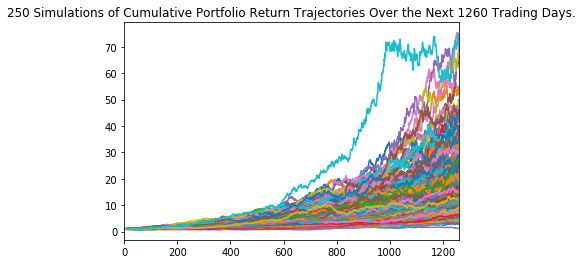

In [8]:
# Create Plot Simulation
line_plot = MC.plot_simulation();

# Save Plot Simulation
line_plot.figure.savefig(f"Images/MC_plot_simulation.png", bbox_inches='tight')

#### Before moving on: Is a high volatile or low volatile outcome more likely?
 
### This graph represents the distribution of returns across all the simulations.

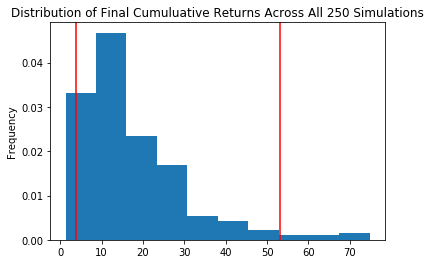

In [9]:
# Create Plot Distribution
plot_dist = MC.plot_distribution();

# Save Plot Distribution
plot_dist.figure.savefig(f"Images/MC_plot_distribution.png", bbox_inches='tight')

#### Does the distribution shown above match expectations to your previous answer of volatility?

In [10]:
# Create Cumulative Return Table
tbl = MC.summarize_cumulative_return()

# Select Initial Investment
initial_investment = int(input("Input the amount of money you'd like to forecast in this analysis: $"))

# Set Lower Confidence Interval
ci_lower = round(tbl[8]*initial_investment,2)

# Set Upper Confidence Interval
ci_upper = round(tbl[9]*initial_investment,2)

# Print Results
print(f"""

There is a 95% chance that an initial investment of ${initial_investment} in the portfolio
over the next {num_years} years will end within in the range of ${ci_lower} and ${ci_upper}""")

Input the amount of money you'd like to forecast in this analysis: $ 1000




There is a 95% chance that an initial investment of $1000 in the portfolio
over the next 5 years will end within in the range of $3776.61 and $53154.66


### These projections are based on the lower and upper confidence intervals.

# Rolling Statistics

## Definition: Looking at rolling statistics gives performance results that are smoothed over defined periods throughout its history. 

### Purpose: To create a more accurate picture than a single snapshot of one period.

### Taking the 30 day rolling average smoothes the graphs and makes it easier to see overall trends. Based on the rolling average, would you change your previous answers?

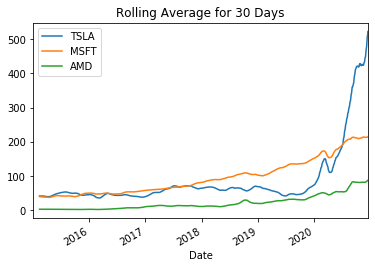

In [11]:
# Find Rolling Mean
rollingmean = portfolio_close.rolling(window=30).mean()

# Plot Rolling Mean
rollingmeanplot = rollingmean.plot(title='Rolling Average for 30 Days');

# Save Figure
rollingmeanplot.figure.savefig(f"Images/rollingmeansplot.png", bbox_inches='tight')

### The Standard Deviation (STD) is a measure of the volatility of a stock.  It can be calculated as a single statistic for an entire dataset.  The higher the STD, the more volatile a stock.

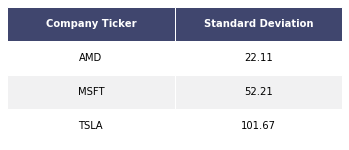

In [12]:
# Calculate STD
overallstd = round(portfolio_close.std().sort_values(),2)

# Create DataFrame
overallstd = pd.DataFrame(overallstd)

# Reset Index
overallstd = overallstd.reset_index()

# Assign Column Names
overallstd.columns = ["Company Ticker", "Standard Deviation"]

# Function to Convert DataFrame as Image
def render_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466E', row_colors=['#F1F1F2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([3.0, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    for k, cell in table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

# Call Function to Convert DataFrame
fig,ax = render_table(overallstd, header_columns=0, col_width=2.0)

# Save STD Figure
fig.savefig("Images/std.png")

#### Based on this statistic, what can you say about the volatility of your stocks?

### The Rolling STD looks at changes in volatility over time.

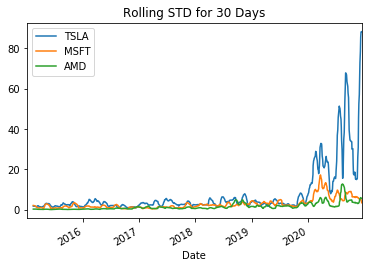

In [13]:
# Find Rolling STD for 30 Days
rollingstd = portfolio_close.rolling(window=30).std()

# Plot Rolling STD
rollingstdplot = rollingstd.plot(title='Rolling STD for 30 Days');

# Save Figure
rollingstdplot.figure.savefig(f"Images/rollingstdplot.png", bbox_inches='tight')

#### Based on this plot, how would you describe the volatility of your stocks?  Are some more volatile than others?  Do they have periods of higher and lower volatility?  What could influence these?

# Daily Return

## Looking at the daily returns of stocks helps to see daily performance comparisons. 

### Purpose: To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends.

In [14]:
# Function to Find Company Name from Ticker
def get_symbol(symbol):
    
    # URL to Yahoo Stocks
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    
    # Get JSON Request
    result = requests.get(url).json()
    
    # Save Result for Each Company
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

This graph shows the daily percent changes of:
Tesla, Inc.
Microsoft Corporation
Advanced Micro Devices, Inc.


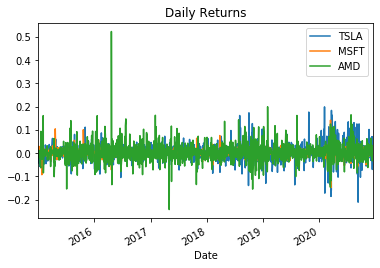

In [15]:
# Print Company Names
print(f"This graph shows the daily percent changes of:")
for x in range(len(stock_list)):
    print(f"{get_symbol(stock_list[x])}")

# Find Daily Returns
stock_performance = portfolio_close.pct_change().dropna()

# Plot Daily Returns
stock_performance_plt = stock_performance.plot.line(title = "Daily Returns")

# Save Figure
stock_performance_plt.figure.savefig(f"Images/daily_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_plt;

#### What can you see and infer from the daily returns graph? 

# Cumulative Return

## Definition: A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, in a time period. 

### Purpose: Looking at the cumulative return of stocks helps to see general performance comparison in a timespan.

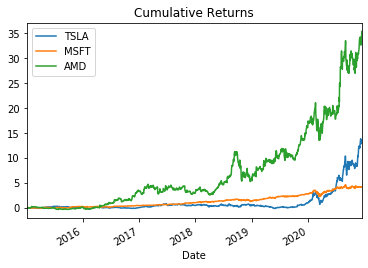

In [16]:
# Create Cumulative Return Function
def CumulativeReturn(daily_returns):
    cumu_return = (1 + daily_returns).cumprod() - 1
    return cumu_return

# Apply Cumulative Return Function
stock_performance_cum = stock_performance.apply(CumulativeReturn)

# Plot Cumulative Return
stock_performance_cum_plt = stock_performance_cum.plot.line(title="Cumulative Returns")

# Save Figure
stock_performance_cum_plt.figure.savefig(f"Images/cumulative_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_cum_plt;

#### What can you see and infer from the cumulative returns graph? 

# Exponentially Weighted Moving Average (EWMA)

## Definition: A view of the average price (open, close, mean) of a stock that gives more weight to the more recent values of the asset.  

### Purpose: The EWMA of a stock can be used as a condfidence indiacator, meaning that a strong but declining stock should have a hard time moving below the EWMA. EWMA can help you to determine what actions to take with an asset depending on its relative position to the close price. 

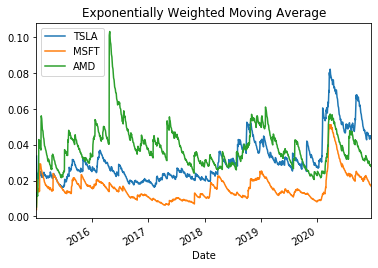

In [17]:
# # Calculate Percent Change
ewma = portfolio_close.pct_change()

# Drop Nulls
ewma = ewma.dropna()

# Calculate Rolling Window using the Exponentially Weighted Moving Average.
ewma = ewma.ewm(halflife=21).std()

# Plot Results
ewma_plot = ewma.plot(title="Exponentially Weighted Moving Average");

# Save Figure
ewma_plot.figure.savefig(f"Images/ewma.png", bbox_inches='tight')

#### Using Exponentially Weighted Moving Average with overlapping closing prices, what would be your action for the assets in the portfolio you created? 

# Risk Analysis

## Definition: Looking at individual assets, risk and return can be directly correlated. Often as risk increases the opportunity for a large return will also increase, but also a large loss. Looking at an entire portfolio a more risk adverse portfolio will be diverse and have stocks or assets that do not directly correlate with each other. 

### Purpose: Risk Analysis is a good tool to weigh the risk versus return for an entire portfolio or a single asset or security. 

In [18]:
# Assign Weights
weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist()

#Calculate the Daily Returns of Portfolio
portfolio_returns = portfolio_close.pct_change()

# Drop NA's
portfolio_returns = portfolio_returns.dropna().copy()

#Add Daily Returns to DataFrame 
portfolio_returns['portfolio_daily_returns'] = portfolio_returns.dot(weights)

#Calculate Cumulative Returns
Cumulative_returns_daily = (1+portfolio_returns).cumprod()

# Assign Sum of Returns
returns_sum = Cumulative_returns_daily['portfolio_daily_returns'].sum()

# Assign Portfolio
covariance_portfolio = portfolio_returns.iloc[:,:-1]

# Take Covariance of the Portfolio
covariance_portfolio = (covariance_portfolio.cov())*252

### Knowing the risk and return of this portfolio, how would you optimize it or change it to reduce risk or increase return? 

In [19]:
#Calculate Annual Volatility
ann_volatility = portfolio_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

# Show Results
for x in range(len(ann_volatility)):
    
    print(f"The Annual Volatility for {get_symbol(stock_list[x])} is {round(ann_volatility[x],2)}")

The Annual Volatility for Tesla, Inc. is 0.55
The Annual Volatility for Microsoft Corporation is 0.28
The Annual Volatility for Advanced Micro Devices, Inc. is 0.62


In [20]:
#Calculate Portfolio Variance and volatility
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#Calculate Portfolio Volatility
portfolio_volatility = np.sqrt(portfolio_variance)

#Calculate Annual and Expected Returns
ann_returns = portfolio_close.resample('Y').last().pct_change().mean()

#Create Table to Display Returns and Volatility
ret_vol_df = pd.concat([ann_returns, ann_volatility], axis=1)

# Rename Columns
ret_vol_df.columns = ['Returns', 'Volatility']

# Show DataFrame
ret_vol_df

,Returns,Volatility
TSLA,1.448407,0.548599
MSFT,0.342767,0.277620
AMD,1.251101,0.622057


### To optimize we need to run a loop that will randomly assign weights to each asset in our portfolio and calculate a new volatility. we will run the loop 5000 times 

In [21]:
# Create Empty List for Portfolio Returns
portfolio_ret = [] 

# Create Empty List for Portfolio Volatility
portfolio_vol = [] 

# Create Empty List for Asset Weights
portfolio_weights = [] 

# Assign Number of Assets
num_assets = len(portfolio_close.columns)

# Assign Number of Portfolios
num_portfolios = 5000

# Assign Random Seed
np.random.seed(30)

# For each Portfolio
for portfolio in range(num_portfolios):

    
    # Assign New Weights
    new_weights = np.random.random(num_assets)
    
    # Divide New Weights by the Sum
    new_weights = new_weights/np.sum(new_weights)
    
    # Add Weights to Empty Weight List
    portfolio_weights.append(new_weights)
    
    # Take Dot Product
    new_returns = np.dot(new_weights, ann_returns) 
    
    # Append Dot Product to Empty Returns List
    portfolio_ret.append(new_returns)
    
    # Take New Cariance
    new_var = covariance_portfolio.mul(new_weights, axis=0).mul(new_weights, axis=1).sum().sum()
    
    # Take Square Root
    sd = np.sqrt(new_var)
    
    # Find Annual SD
    ann_sd = sd*np.sqrt(250) 
    
    # Append Annual SD to Portfolio
    portfolio_vol.append(ann_sd)
    
    # Create Port Return & Port Volatility Dictionary
    data = {'Portfolio Returns':portfolio_ret, 'Portfolio Volatility':portfolio_vol}

# For List to Create DataFrame
for counter, symbol in enumerate(portfolio_close.columns.tolist()):
    
    # Add Each Weight
    data[symbol+' weight'] = [w[counter] for w in portfolio_weights]
    
    # Save as DataFrame
    portfolios  = pd.DataFrame(data)
    
# Show Portfolio
portfolios 

,Portfolio Returns,Portfolio Volatility,TSLA weight,MSFT weight,AMD weight
0,1.121503,6.363461,0.381615,0.225570,0.392815
1,0.679393,4.810665,0.111106,0.653537,0.235357
2,1.241262,6.771163,0.547172,0.129687,0.323141
3,1.211081,7.001270,0.374119,0.125324,0.500557
4,0.983254,6.024597,0.233530,0.345604,0.420865
...,...,...,...,...,...
4995,1.271883,7.140837,0.452368,0.075383,0.472250
4996,0.987568,5.656246,0.357340,0.367748,0.274911
4997,1.271140,6.930795,0.628427,0.114444,0.257129
4998,1.276016,6.954651,0.631104,0.109657,0.259239


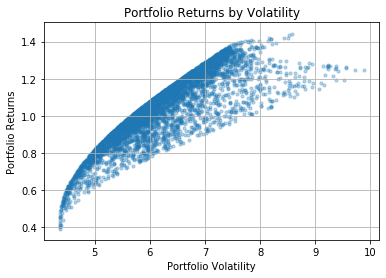

In [22]:
# Plot Returns by Volatility
portfolio_scatter = portfolios.plot.scatter(x='Portfolio Volatility', y='Portfolio Returns', title='Portfolio Returns by Volatility', marker='o', s=10, alpha=0.3, grid=True);

# Save Figure
portfolio_scatter.figure.savefig(f"Images/portfolio_scatter.png", bbox_inches='tight')

#### Does returns and volatility have a positive or negative correlation?

# Sharpe Ratios

## Definition: average return earned beyond the risk-free rate per unit of volatility, the measure of the price fluctuations of an asset. The greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

### Purpose: The ratio describes the compensation an investor will receive for the extra volatility endured when holding a riskier asset.

In [23]:
# Assign Sharpe Ratio Input
sharpe_input = portfolio_close.pct_change().dropna()

# Calculate Annualized Sharpe Ratios
sharpe_ratios = (sharpe_input.mean()*252) / (sharpe_input.std()*np.sqrt(252))

# Show results
for x in range(len(sharpe_ratios)):
    
    # Print Sharpe Ratios
    print(f"The Sharpe Ratio of {get_symbol(stock_list[x])} is {round(sharpe_ratios[x],2)}")

The Sharpe Ratio of Tesla, Inc. is 1.09
The Sharpe Ratio of Microsoft Corporation is 1.13
The Sharpe Ratio of Advanced Micro Devices, Inc. is 1.26


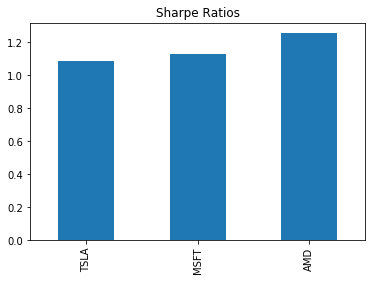

In [24]:
# Visualize Sharpe Ratios as a Bar Plot
sharpe_ratios_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

# Save Figure
sharpe_ratios_plot.figure.savefig(f"Images/sharpe_ratios.png", bbox_inches='tight')

#### Based on Sharpe Ratios, which stock is the most volatile?